In [ ]:
pip install scikit-fuzzy

65.00000000000001


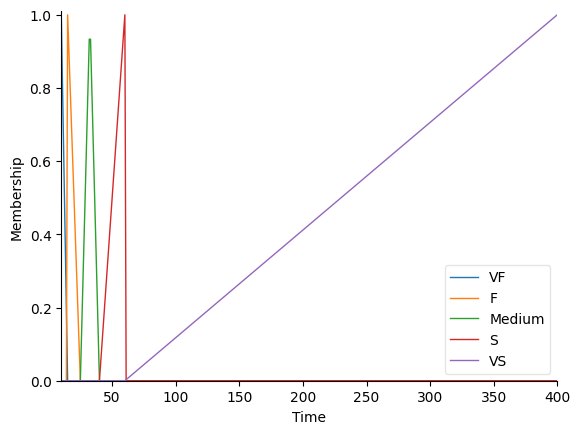

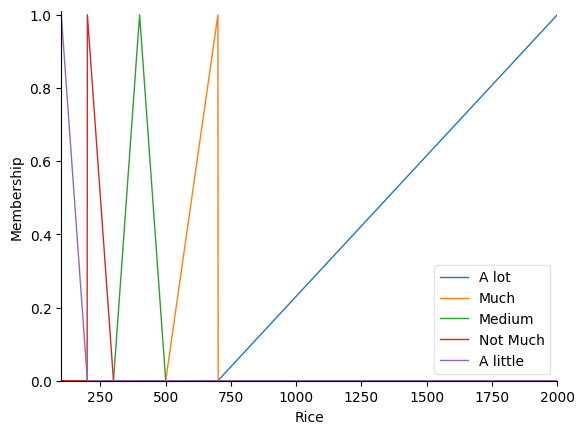

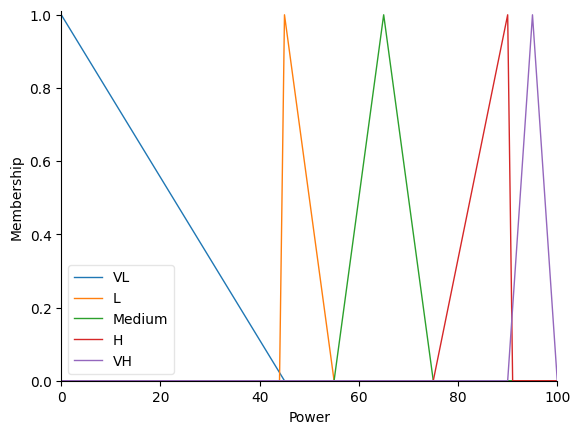

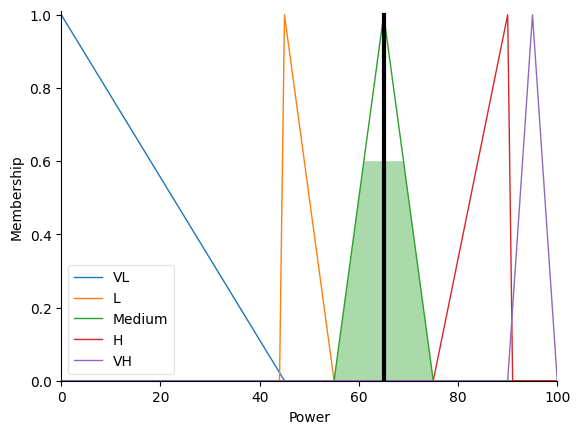

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Time = ctrl.Antecedent(np.arange(10,401,1),'Time')
Rice = ctrl.Antecedent(np.arange(100,2001,1),'Rice')
Power = ctrl.Consequent(np.arange(0,101,1),'Power')

Time['VF'] = fuzz.trimf(Time.universe,[10,10,15])
Time['F'] = fuzz.trimf(Time.universe,[15,15,25])
Time['Medium'] = fuzz.trimf(Time.universe,[25,32.5,40])
Time['S'] = fuzz.trimf(Time.universe,[40,60,60])
Time['VS'] = fuzz.trimf(Time.universe,[60,400,400])
Time.view()

Rice['A lot'] = fuzz.trimf(Rice.universe,[700,2000,2000])
Rice['Much'] = fuzz.trimf(Rice.universe,[500,700,700])
Rice['Medium'] = fuzz.trimf(Rice.universe,[300,400,500])
Rice['Not Much'] = fuzz.trimf(Rice.universe,[200,200,300])
Rice['A little'] = fuzz.trimf(Rice.universe,[100,100,200])
Rice.view()

Power['VL'] = fuzz.trimf(Power.universe,[0,0,45])
Power['L'] = fuzz.trimf(Power.universe,[45,45,55])
Power['Medium'] = fuzz.trimf(Power.universe,[55,65,75])
Power['H'] = fuzz.trimf(Power.universe,[75,90,90])
Power['VH'] = fuzz.trimf(Power.universe,[90,95,100])
Power.view()

rule1 = ctrl.Rule(Time['VF'] & Rice['A little'],Power['Medium'])
rule2 = ctrl.Rule(Time['VF'] & Rice['Not Much'],Power['Medium'])
rule3 = ctrl.Rule(Time['VF'] & Rice['Medium'],Power['H'])
rule4 = ctrl.Rule(Time['VF'] & Rice['Much'],Power['H'])
rule5 = ctrl.Rule(Time['VF'] & Rice['A lot'],Power['VH'])
#
rule6 = ctrl.Rule(Time['F'] & Rice['A little'],Power['Medium'])
rule7 = ctrl.Rule(Time['F'] & Rice['Not Much'],Power['Medium'])
rule8 = ctrl.Rule(Time['F'] & Rice['Medium'],Power['H'])
rule9 = ctrl.Rule(Time['F'] & Rice['Much'],Power['H'])
rule10 = ctrl.Rule(Time['F'] & Rice['A lot'],Power['VH'])
#
rule11 = ctrl.Rule(Time['Medium'] & Rice['A little'],Power['VL'])
rule12 = ctrl.Rule(Time['Medium'] & Rice['Not Much'],Power['L'])
rule13 = ctrl.Rule(Time['Medium'] & Rice['Medium'],Power['Medium'])
rule14 = ctrl.Rule(Time['Medium'] & Rice['Much'],Power['Medium'])
rule15 = ctrl.Rule(Time['Medium'] & Rice['A lot'],Power['H'])
#
rule16 = ctrl.Rule(Time['S'] & Rice['A little'],Power['VL'])
rule17 = ctrl.Rule(Time['S'] & Rice['Not Much'],Power['VL'])
rule18 = ctrl.Rule(Time['S'] & Rice['Medium'],Power['L'])
rule19= ctrl.Rule(Time['S'] & Rice['Much'],Power['Medium'])
rule20 = ctrl.Rule(Time['S'] & Rice['A lot'],Power['Medium'])
#
rule21 = ctrl.Rule(Time['VS'] & Rice['A little'],Power['L'])
rule22 = ctrl.Rule(Time['VS'] & Rice['Not Much'],Power['L'])
rule23 = ctrl.Rule(Time['VS'] & Rice['Medium'],Power['L'])
rule24= ctrl.Rule(Time['VS'] & Rice['Much'],Power['Medium'])
rule25 = ctrl.Rule(Time['VS'] & Rice['A lot'],Power['Medium'])


tipping_ctrl= ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

#Gán giá trị
tipping.input["Time"] =12
tipping.input["Rice"] = 200
tipping.compute()
print(tipping.output["Power"])
Power.view(sim = tipping)



In [ ]:
#